In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [3]:
# Downloading the stopwards:
nltk.download('stopwards')

[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index


False

In [4]:
# Loading the dataset:-
df = pd.read_csv('IMDB Dataset.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign='left',stralign='left'))

| review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

**Text Preprocessing**

In [5]:
# Remove HTML tags:
df['review']= df['review'].apply(lambda x: re.sub('<.*?>','',x))

In [6]:
# Removing non-alphabetic characters and converting to lowercase:-
df['review']= df['review'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x).lower())

In [8]:
# Tokenizing and removing stopwords:-
import nltk
nltk.download('stopwords')  # Download the stopwords dataset

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['review']= df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Stemming:-

stemmer = PorterStemmer()
df['review']= df['review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

**Feature Extraction**

In [13]:
# TF- IDF Vectorization:-

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X= tfidf_vectorizer.fit_transform(df['review'])
y= df['sentiment'].map({'positive':1, 'negative':0})


In [14]:
# Splitting data into Training and Testing Sets:-

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Model Selection and Training:-

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC()
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

In [22]:
# Model Evaluations:-
for name, model in models.items():
  print(f'\n---{name}---')
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





---Logistic Regression---
Accuracy: 0.8814
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[4309  652]
 [ 534 4505]]

---Naive Bayes---
Accuracy: 0.8814
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[4309  652]
 [ 534 4505]]

---Linear SVC---
Accuracy: 0.8814
Classification Report:
               precision    recall  f1-score   support

           0

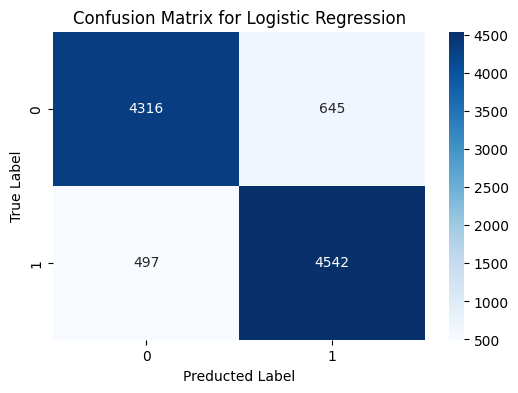

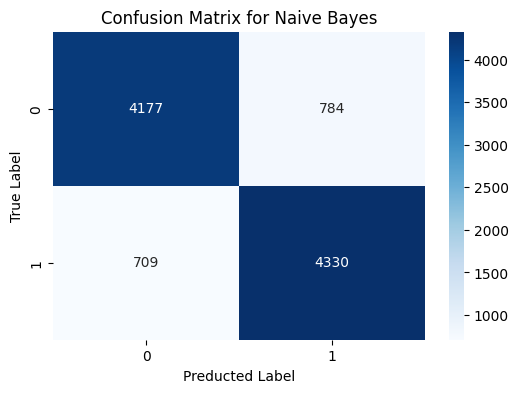

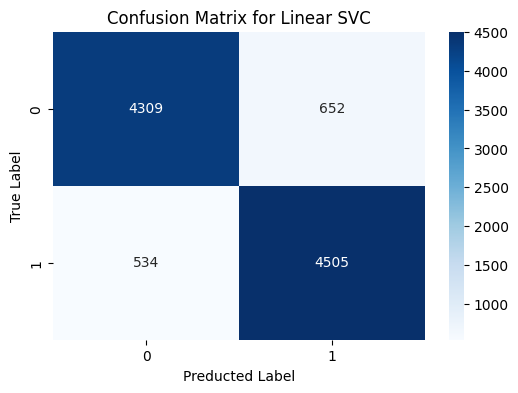

In [23]:
# Visualizing Confusion Matrix:-

for name, model in models.items():
  y_pred = model.predict(X_test)
  plt.figure(figsize=(6,4))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='Blues')
  plt.title(f'Confusion Matrix for {name}')
  plt.xlabel("Preducted Label")
  plt.ylabel('True Label')
  plt.show()

**Sample Test**

In [19]:
sample_review = "Thhis movie was absolutely fanstastic! The acting was superb, the story was engaging, and the visuals were stunning."
sample_review_processed = tfidf_vectorizer.transform([sample_review])

for name, model in models.items():
  prediction = model.predict(sample_review_processed)[0]
  sentiment = "positive" if prediction ==1 else "negative"
  print(f"\n-----{name}-----")
  print(f"Sample Review: {sample_review}")
  print(f"Predicted Sentiment: {sentiment}")


-----Logistic Regression-----
Sample Review: Thhis movie was absolutely fanstastic! The acting was superb, the story was engaging, and the visuals were stunning.
Predicted Sentiment: positive

-----Naive Bayes-----
Sample Review: Thhis movie was absolutely fanstastic! The acting was superb, the story was engaging, and the visuals were stunning.
Predicted Sentiment: positive

-----Linear SVC-----
Sample Review: Thhis movie was absolutely fanstastic! The acting was superb, the story was engaging, and the visuals were stunning.
Predicted Sentiment: positive
